Write a python function that takes as input two numeric lists and returns the value of the
correlation between the two lists. Use the data shown below to test your function. The value of the
correlation function for this data is 0.5298

Place this function in your library of functions when you completed it. Also after you gotten your
correlation function to work, create a generic xy plot function that can plot the data as either a scatter plot
or an xy plot that draw a line between the data points. Place the plotting function in your function library.
This will give a feel for how a correlation value corresponds to what you see in the scatterplot.

* X  Y
* 43 99
* 21 65
* 25 79
* 42 75
* 57 87
* 59 81

function for graphing 2 lists of data as scatter or line

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def correlation(list1, list2):
    x_sum = 0
    y_sum = 0
    e1 = 0
    x_sq = 0
    y_sq = 0
    
    for num in range(len(list1)):
        x_sum += list1[num]
        y_sum += list2[num]
        e1+=  list1[num]*list2[num]
        x_sq += list1[num]**2
        y_sq += list2[num]**2
    
    e1= e1* len(list1)
    
    x_sq_sub = (x_sq *len(list1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(list2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr

def scatter_plot(x_list, y_list, color='blue', point='o'):
    plt.scatter(x_list, y_list, c=color, marker=point)
    plt.show()
    
def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

0.5298089018901744


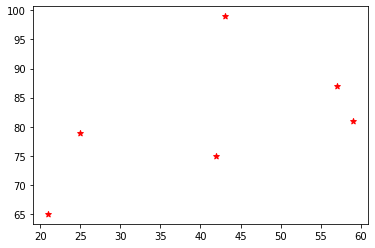

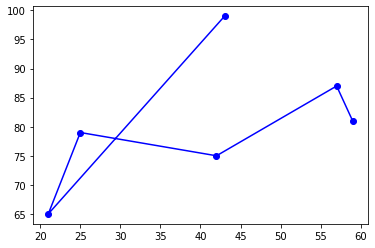

In [3]:
xs = [43,21,25,42,57,59]
ys = [99,65,79,75,87,81]

corre = correlation(xs,ys)
print(corre)

scatter_plot(xs,ys,'red', "*")
line_graph(xs,ys)
# line_graph([[1,2,3],[1,2,3]], [[2,3,4], [1,3,5]], amount=2, colour=['red', 'blue'], mark=['o', "*"], line=["-", "--"]) #TEST. NOT RELATED TO THE ASSIGNMENT